<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Load-audios-csv" data-toc-modified-id="Load-audios-csv-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load audios csv</a></span><ul class="toc-item"><li><span><a href="#Encoding" data-toc-modified-id="Encoding-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Encoding</a></span></li><li><span><a href="#Classification-with-KERAS" data-toc-modified-id="Classification-with-KERAS-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Classification with KERAS</a></span></li></ul></li><li><span><a href="#Model-visualization" data-toc-modified-id="Model-visualization-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model visualization</a></span></li><li><span><a href="#Export-model" data-toc-modified-id="Export-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Export model</a></span></li></ul></div>

# Imports

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
from keras import models
from keras import layers

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

#  Load audios csv

In [5]:
df = pd.read_pickle("output/newgenres_allfeatures_pickle.pkl")

In [6]:
pd.set_option("display.max_columns",None)
df.head()

,beats,fft,label,onset_strength,plp,sample,spectral_band_width,spectral_centroid,spectral_rolloff,sr,zero_crossings,chroma_stft1,chroma_stft2,chroma_stft3,chroma_stft4,chroma_stft5,chroma_stft6,chroma_stft7,chroma_stft8,chroma_stft9,chroma_stft10,chroma_stft11,chroma_stft12,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,tc1,tc2,tc3,tc4,tc5,tc6,tc7,tc8,tc9,tc10,tc11,tc12
0,160.995815,0.003161,Tragedy,0.770123,0.247723,"[0.0031614932, 0.004773572, 0.0039517847, 0.00...",1095.420820,695.430647,1155.376347,22050.0,11599.0,0.625209,0.264360,0.145277,0.126021,0.134681,0.283547,0.267478,0.589635,0.284697,0.130169,0.123678,0.229146,-306.328094,153.603271,24.492928,28.643250,20.572241,3.647248,-1.352207,2.307954,-2.905295,-3.482113,-4.586892,-4.706417,-3.045570,-6.929031,-2.655667,-3.291554,-6.635974,-3.091608,-2.022602,3.165855,0.625209,0.264360,0.145277,0.126021,0.134681,0.283547,0.267478,0.589635,0.284697,0.130169,0.123678,0.229146
1,228.073438,-0.133836,Tragedy,0.794470,0.166727,"[-0.13383609, -0.1150003, -0.092456296, -0.072...",1184.875813,916.551008,1530.724077,22050.0,24318.0,0.393309,0.130859,0.170693,0.160997,0.117632,0.299580,0.208584,0.588173,0.198253,0.088861,0.145288,0.141833,-300.818787,156.915634,11.483715,19.755430,19.336124,1.617969,-6.559680,0.474576,-1.698883,-2.468211,-0.062021,-3.782900,-8.428603,-6.619506,0.483258,-3.618389,-6.932236,-0.194252,3.930653,8.218729,0.393309,0.130859,0.170693,0.160997,0.117632,0.299580,0.208584,0.588173,0.198253,0.088861,0.145288,0.141833
2,275.152344,-0.003690,Tragedy,0.853477,0.180700,"[-0.003690471, -0.0139793, -0.028602894, -0.04...",1467.756385,963.589641,1661.756618,22050.0,18239.0,0.623078,0.233357,0.248169,0.387914,0.171226,0.239712,0.186718,0.445354,0.158188,0.098909,0.161738,0.243072,-296.851837,147.240341,26.442554,14.872575,21.402719,5.162282,-8.356946,-1.923306,-4.983230,-5.928154,1.867137,1.402907,-0.396494,-1.113855,-9.135202,-10.325824,-7.438524,2.249033,-4.205639,0.559302,0.623078,0.233357,0.248169,0.387914,0.171226,0.239712,0.186718,0.445354,0.158188,0.098909,0.161738,0.243072
3,221.262638,0.076631,Tragedy,0.956061,0.274022,"[0.076631024, 0.081104994, 0.08139978, 0.07665...",1577.504260,1215.362642,2221.686566,22050.0,24025.0,0.557997,0.211770,0.298025,0.339477,0.137677,0.212804,0.201455,0.504256,0.206796,0.141792,0.189679,0.226079,-253.117554,144.873840,1.876171,22.006760,10.369125,3.469567,-3.051390,-0.010458,-7.991582,0.340207,0.519960,2.635351,2.110406,0.032125,-3.791139,-9.512409,-9.480229,1.047903,-4.472299,-0.468805,0.557997,0.211770,0.298025,0.339477,0.137677,0.212804,0.201455,0.504256,0.206796,0.141792,0.189679,0.226079
4,221.339844,-0.077862,Tragedy,0.893133,0.251873,"[-0.07786221, -0.07070627, -0.0717304, -0.0763...",1428.665283,1069.079396,2172.736862,22050.0,14217.0,0.616560,0.269072,0.221069,0.324529,0.214379,0.268919,0.245925,0.463542,0.194205,0.103235,0.112062,0.254729,-231.431351,151.140915,-6.177701,28.428581,14.401770,-1.785310,-0.745060,3.755984,-8.562571,2.430588,-2.957428,-4.217696,-2.148839,-6.022779,-7.162249,-10.892292,-11.198408,-4.078661,-9.899024,-5.245070,0.616560,0.269072,0.221069,0.324529,0.214379,0.268919,0.245925,0.463542,0.194205,0.103235,0.112062,0.254729


In [7]:
df.shape

(4272, 55)

In [8]:
df = df.drop(['sample','sr'],axis=1)

In [9]:
df.label.value_counts()

Adventure    1151
Happy         936
Action        905
Tragedy       789
Horror        491
Name: label, dtype: int64

In [10]:
#df = df[df.label.isin(['Action', 'Beautiful', "Adventure"])]
#loss: 0.9415 - accuracy: 0.7889

In [11]:
df = df[df.label.isin(['Adventure','Happy','Action','Tragedy','Horror'])]

In [12]:
df.shape

(4272, 53)

## Encoding

In [13]:
genre_list = df['label']
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)

In [14]:
encoder.classes_

array(['Action', 'Adventure', 'Happy', 'Horror', 'Tragedy'], dtype=object)

In [15]:
df.head()

,beats,fft,label,onset_strength,plp,spectral_band_width,spectral_centroid,spectral_rolloff,zero_crossings,chroma_stft1,chroma_stft2,chroma_stft3,chroma_stft4,chroma_stft5,chroma_stft6,chroma_stft7,chroma_stft8,chroma_stft9,chroma_stft10,chroma_stft11,chroma_stft12,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,tc1,tc2,tc3,tc4,tc5,tc6,tc7,tc8,tc9,tc10,tc11,tc12
0,160.995815,0.003161,Tragedy,0.770123,0.247723,1095.420820,695.430647,1155.376347,11599.0,0.625209,0.264360,0.145277,0.126021,0.134681,0.283547,0.267478,0.589635,0.284697,0.130169,0.123678,0.229146,-306.328094,153.603271,24.492928,28.643250,20.572241,3.647248,-1.352207,2.307954,-2.905295,-3.482113,-4.586892,-4.706417,-3.045570,-6.929031,-2.655667,-3.291554,-6.635974,-3.091608,-2.022602,3.165855,0.625209,0.264360,0.145277,0.126021,0.134681,0.283547,0.267478,0.589635,0.284697,0.130169,0.123678,0.229146
1,228.073438,-0.133836,Tragedy,0.794470,0.166727,1184.875813,916.551008,1530.724077,24318.0,0.393309,0.130859,0.170693,0.160997,0.117632,0.299580,0.208584,0.588173,0.198253,0.088861,0.145288,0.141833,-300.818787,156.915634,11.483715,19.755430,19.336124,1.617969,-6.559680,0.474576,-1.698883,-2.468211,-0.062021,-3.782900,-8.428603,-6.619506,0.483258,-3.618389,-6.932236,-0.194252,3.930653,8.218729,0.393309,0.130859,0.170693,0.160997,0.117632,0.299580,0.208584,0.588173,0.198253,0.088861,0.145288,0.141833
2,275.152344,-0.003690,Tragedy,0.853477,0.180700,1467.756385,963.589641,1661.756618,18239.0,0.623078,0.233357,0.248169,0.387914,0.171226,0.239712,0.186718,0.445354,0.158188,0.098909,0.161738,0.243072,-296.851837,147.240341,26.442554,14.872575,21.402719,5.162282,-8.356946,-1.923306,-4.983230,-5.928154,1.867137,1.402907,-0.396494,-1.113855,-9.135202,-10.325824,-7.438524,2.249033,-4.205639,0.559302,0.623078,0.233357,0.248169,0.387914,0.171226,0.239712,0.186718,0.445354,0.158188,0.098909,0.161738,0.243072
3,221.262638,0.076631,Tragedy,0.956061,0.274022,1577.504260,1215.362642,2221.686566,24025.0,0.557997,0.211770,0.298025,0.339477,0.137677,0.212804,0.201455,0.504256,0.206796,0.141792,0.189679,0.226079,-253.117554,144.873840,1.876171,22.006760,10.369125,3.469567,-3.051390,-0.010458,-7.991582,0.340207,0.519960,2.635351,2.110406,0.032125,-3.791139,-9.512409,-9.480229,1.047903,-4.472299,-0.468805,0.557997,0.211770,0.298025,0.339477,0.137677,0.212804,0.201455,0.504256,0.206796,0.141792,0.189679,0.226079
4,221.339844,-0.077862,Tragedy,0.893133,0.251873,1428.665283,1069.079396,2172.736862,14217.0,0.616560,0.269072,0.221069,0.324529,0.214379,0.268919,0.245925,0.463542,0.194205,0.103235,0.112062,0.254729,-231.431351,151.140915,-6.177701,28.428581,14.401770,-1.785310,-0.745060,3.755984,-8.562571,2.430588,-2.957428,-4.217696,-2.148839,-6.022779,-7.162249,-10.892292,-11.198408,-4.078661,-9.899024,-5.245070,0.616560,0.269072,0.221069,0.324529,0.214379,0.268919,0.245925,0.463542,0.194205,0.103235,0.112062,0.254729


In [16]:
y [0]

4

In [17]:
encoder.classes_[np.argmax(y[0])]

'Action'

In [18]:
#representar array en grafico para ver cantidad de "genero"

In [19]:
from keras.utils import np_utils

In [20]:
y= np_utils.to_categorical(y)

In [21]:
y.shape

(4272, 5)

In [22]:
print(list(df.columns.values))

['beats', 'fft', 'label', 'onset_strength', 'plp', 'spectral_band_width', 'spectral_centroid', 'spectral_rolloff', 'zero_crossings', 'chroma_stft1', 'chroma_stft2', 'chroma_stft3', 'chroma_stft4', 'chroma_stft5', 'chroma_stft6', 'chroma_stft7', 'chroma_stft8', 'chroma_stft9', 'chroma_stft10', 'chroma_stft11', 'chroma_stft12', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'tc1', 'tc2', 'tc3', 'tc4', 'tc5', 'tc6', 'tc7', 'tc8', 'tc9', 'tc10', 'tc11', 'tc12']


In [23]:
#Chroma
X = df.drop(['label'],axis=1).iloc[:,7:40]
X.head()

,zero_crossings,chroma_stft1,chroma_stft2,chroma_stft3,chroma_stft4,chroma_stft5,chroma_stft6,chroma_stft7,chroma_stft8,chroma_stft9,chroma_stft10,chroma_stft11,chroma_stft12,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,11599.0,0.625209,0.264360,0.145277,0.126021,0.134681,0.283547,0.267478,0.589635,0.284697,0.130169,0.123678,0.229146,-306.328094,153.603271,24.492928,28.643250,20.572241,3.647248,-1.352207,2.307954,-2.905295,-3.482113,-4.586892,-4.706417,-3.045570,-6.929031,-2.655667,-3.291554,-6.635974,-3.091608,-2.022602,3.165855
1,24318.0,0.393309,0.130859,0.170693,0.160997,0.117632,0.299580,0.208584,0.588173,0.198253,0.088861,0.145288,0.141833,-300.818787,156.915634,11.483715,19.755430,19.336124,1.617969,-6.559680,0.474576,-1.698883,-2.468211,-0.062021,-3.782900,-8.428603,-6.619506,0.483258,-3.618389,-6.932236,-0.194252,3.930653,8.218729
2,18239.0,0.623078,0.233357,0.248169,0.387914,0.171226,0.239712,0.186718,0.445354,0.158188,0.098909,0.161738,0.243072,-296.851837,147.240341,26.442554,14.872575,21.402719,5.162282,-8.356946,-1.923306,-4.983230,-5.928154,1.867137,1.402907,-0.396494,-1.113855,-9.135202,-10.325824,-7.438524,2.249033,-4.205639,0.559302
3,24025.0,0.557997,0.211770,0.298025,0.339477,0.137677,0.212804,0.201455,0.504256,0.206796,0.141792,0.189679,0.226079,-253.117554,144.873840,1.876171,22.006760,10.369125,3.469567,-3.051390,-0.010458,-7.991582,0.340207,0.519960,2.635351,2.110406,0.032125,-3.791139,-9.512409,-9.480229,1.047903,-4.472299,-0.468805
4,14217.0,0.616560,0.269072,0.221069,0.324529,0.214379,0.268919,0.245925,0.463542,0.194205,0.103235,0.112062,0.254729,-231.431351,151.140915,-6.177701,28.428581,14.401770,-1.785310,-0.745060,3.755984,-8.562571,2.430588,-2.957428,-4.217696,-2.148839,-6.022779,-7.162249,-10.892292,-11.198408,-4.078661,-9.899024,-5.245070


In [24]:
#MFCC
#X = df.drop(['label'],axis=1).iloc[:,20:40]
#X.head()

In [25]:

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [26]:
X[0]

array([-0.70018095,  1.19706102, -0.41405663, -1.22567082, -1.2190177 ,
       -1.16190103, -0.29938851, -0.38473264,  1.09105984, -0.34477312,
       -1.24609815, -1.15389682, -0.62933388, -0.69369854,  0.31086483,
        1.02215092,  0.28252232,  1.40174513, -0.29837132, -0.03031115,
       -0.11274362, -0.01345519, -0.70046126, -0.15614954, -0.78601893,
       -0.16727057, -1.1515604 , -0.05655387, -0.68533333, -0.81302289,
       -0.72070906,  0.06689342,  0.49897205])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Classification with KERAS

In [28]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
network.add(layers.Dropout(0.3))

network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dropout(0.3))

network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dropout(0.3))

network.add(layers.Dense(128, activation='relu'))
network.add(layers.Dropout(0.3))

network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dropout(0.3))

network.add(layers.Dense(y.shape[-1], activation='softmax'))

In [29]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               8704      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               3

In [30]:
from keras.optimizers import Adam
optimizer = Adam(lr = 0.001)

In [31]:
network.compile(optimizer= optimizer,
              loss='categorical_crossentropy',
                
               metrics=['accuracy'])

In [32]:
history = network.fit(X_train,
                    y_train,
                    epochs=40,
                    batch_size=128,
                     validation_data=(X_test,y_test))


Epoch 1/40
27/27 [==============================] - 2s 37ms/step - loss: 1.5270 - accuracy: 0.3091 - val_loss: 1.3026 - val_accuracy: 0.4830
Epoch 2/40
27/27 [==============================] - 0s 6ms/step - loss: 1.3471 - accuracy: 0.4319 - val_loss: 1.2308 - val_accuracy: 0.5462
Epoch 3/40
27/27 [==============================] - 0s 5ms/step - loss: 1.2961 - accuracy: 0.4682 - val_loss: 1.1942 - val_accuracy: 0.5111
Epoch 4/40
27/27 [==============================] - 0s 6ms/step - loss: 1.2315 - accuracy: 0.4944 - val_loss: 1.1259 - val_accuracy: 0.5684
Epoch 5/40
27/27 [==============================] - 0s 6ms/step - loss: 1.1791 - accuracy: 0.5145 - val_loss: 1.0652 - val_accuracy: 0.5965
Epoch 6/40
27/27 [==============================] - 0s 6ms/step - loss: 1.1197 - accuracy: 0.5628 - val_loss: 1.0431 - val_accuracy: 0.6058
Epoch 7/40
27/27 [==============================] - 0s 6ms/step - loss: 1.0456 - accuracy: 0.5827 - val_loss: 0.9654 - val_accuracy: 0.6444
Epoch 8/40
27/27 [=

In [33]:
test_loss, test_acc = network.evaluate(X_test,y_test)

27/27 [==============================] - 0s 792us/step - loss: 0.5807 - accuracy: 0.8222


# Model visualization

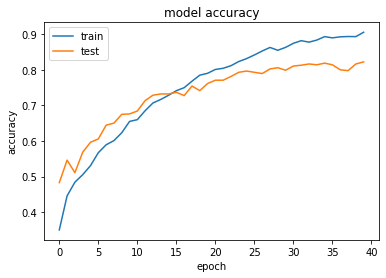

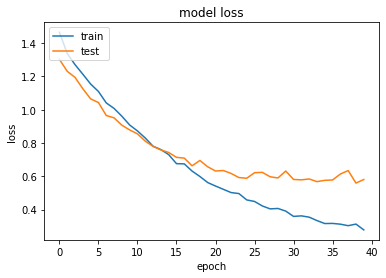

In [38]:

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("output/model_accuracy.svg")

plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("output/model_loss.svg")
plt.show()

# Export model

In [37]:
network.save('Output/trained_ost_model.h5')

- cargar el audio. en fragmentos de 15 sec
- sacar sus features
- usar el mismo standard scaler(buscar como guardarlo también)
- predict (el df resultante es mi x test)
- interpretar predict (sale un vector con diferentes valores, uno para cada robabilidad de que sea ese genero(cada columna es un genero))
